# –õ–∞–±–æ—Ä–∞—Ç–æ—Ä–Ω–∞—è –†–∞–±–æ—Ç–∞ "–ñ–µ—Å—Ç–∫–∏–µ —Å–∏—Å—Ç–µ–º—ã –û–î–£"

In [1]:
from solvers import *
import matplotlib.pyplot as plt
import numpy as np
import tqdm


> **–î–ò–°–ö–õ–ï–ô–ú–ï–†:** –†–µ–∞–ª–∏–∑–∞—Ü–∏–∏ –º–µ—Ç–æ–¥–æ–≤ –ª–µ–∂–∞—Ç –≤ —Ñ–∞–π–ª–µ ```solvers.py```

## –ó–∞–¥–∞—á–∞

–í–∞—Ä–∏–∞–Ω—Ç 14, –∑–∞–¥–∞—á–∞ X.9.14: –≠–∫–æ–≥–µ–Ω–µ—Ç–∏—á–µ—Å–∫–∞—è –º–æ–¥–µ–ª—å ‚Ññ2.

$$\begin{cases} 
\dot{x} = x(2 \alpha_1 - 0.5x - \alpha_1^2 \alpha_2^{-2}y) \\
\dot{y} = y(2 \alpha_2 - 0.5y - \alpha_2^2 \alpha_1^{-2}x) \\
\dot{\alpha_1} = 2\varepsilon(1 - \alpha_1 \alpha_2^{-2}y) \\
\dot{\alpha_2} = 2\varepsilon(1 - \alpha_2 \alpha_1^{-2}x) \\
\end{cases}$$

–°–æ —Å–ª–µ–¥—É—é—â–∏–º–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏ –∏ –Ω–∞—á–∞–ª—å–Ω—ã–º–∏ —É—Å–ª–æ–≤–∏—è–º–∏:

$$\begin{cases}
\varepsilon \le 0.01 \\
0 \le x_0 \le 40 \\
0 \le y_0 \le 40 \\
\alpha_{10} << 1 \\
\alpha_{20} = 10 \\
0 \le t \le 2000
\end{cases}$$

In [2]:
DEFAULT_START = np.array([20, 20, 0.1, 10], dtype=CALC_TYPE)
DEFAULT_BOUNDS = (0, 2000)

# Y = [x, y, a1, a2]
# start = Y0
def task(eps, h, solvers, labels, title, start=DEFAULT_START, tbounds=DEFAULT_BOUNDS):
    tmin, tmax = tbounds
    t0 = 0

    def func(Y, t):
        x, y, a1, a2 = Y
        f = np.empty_like(Y)

        f[0] = x * (2 * a1 - 0.5*x - y*(a1/a2)**2)
        f[1] = y * (2 * a2 - 0.5*y - x*(a2/a1)**2)
        f[2] = 2 * eps * (1 - y*a1 / (a2**2))
        f[3] = 2 * eps * (1 - x*a2 / (a1**2))

        return f

    for solver in solvers:
        solver.init_problem(func, t0, start)

    fig, ((xplot, a1plot), (yplot, a2plot)) = plt.subplots(2, 2)
    fig.set_size_inches(14, 10)

    def init_subplot(ax, name, startval):
        ax.set_xlabel("$t$")
        ax.set_ylabel(f"${name}$")
        ax.set_title(f"${name} (t)$")
        ax.grid()
        ax.set_xlim([tmin, tmax])
        ax.scatter([t0], [startval], 64, marker="o", color="k", zorder=16)

    init_subplot(xplot, "x", start[0])
    init_subplot(yplot, "y", start[1])
    init_subplot(a1plot, "\\alpha_1", start[2])
    init_subplot(a2plot, "\\alpha_2", start[3])

    def plot(T, X, Y, A1, A2, label, *args):
        xplot.plot(T, X, *args, label=label)
        yplot.plot(T, Y, *args)
        a1plot.plot(T, A1, *args)
        a2plot.plot(T, A2, *args)

    for i, (solver, label) in enumerate(zip(solvers, labels)):
        nsteps = np.ceil((tmax - t0) / solver.get_h()).astype(np.uint64)
        
        T = []
        X = []
        Y = []
        A1 = []
        A2 = []

        for _ in tqdm.tqdm(range(nsteps)):
            t, (x, y, a1, a2) = solver.step()
            T.append(t)
            X.append(x)
            Y.append(y)
            A1.append(a1)
            A2.append(a2)

        if i + 1 == len(solvers):
            plot(T, X, Y, A1, A2, label, "k--")
        else:
            plot(T, X, Y, A1, A2, label)

        
    fig.legend()
    plt.suptitle(f"$Ecogenetic, \\varepsilon={eps}$\n${title}, h={h}$")
    plt.show()

### –í–∞–ª–∏–¥–∞—Ü–∏—è

–ü—Ä–æ–≤–µ—Ä—è—Ç—å —Ä–∞–±–æ—Ç–æ—Å–ø–æ—Å–æ–±–Ω–æ—Å—Ç—å –º–µ—Ç–æ–¥–æ–≤ –±—É–¥–µ–º –Ω–∞ –±–æ–ª–µ–µ –ø—Ä–æ—Å—Ç–æ–π –∑–∞–¥–∞—á–µ —Ç–æ–π –∂–µ —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç–∏:

$$\begin{cases}
\ddot{x} + x = 0.2 cos(t) \\
\ddot{y} + y = 0.2 cos(t) \\
x_0 = 1,~ \dot{x}_0 = 0 \\
y_0 = 0,~ \dot{y}_0 = 1 \\
\end{cases}$$

–ò–º–µ—é—â—É—é –∞–Ω–∞–ª–∏—Ç–∏—á–µ—Å–∫–æ–µ —Ä–µ—à–µ–Ω–∏–µ

$$\begin{cases}
x(t) = cos(t) + 0.1tsin(t) \\
y(t) = sin(t) + 0.1tsin(t)
\end{cases}$$

In [3]:
def validate(solvers, labels, steps, bound, title):
    # Y = x, y, x', y'
    def test_f(Y, t):
        x, y, xd, yd = Y

        f = np.empty_like(Y, dtype=CALC_TYPE)

        val = 0.2 * np.cos(t)

        f[0] = xd # x' = xd 
        f[1] = yd # y' = yd
        f[2] = - x + val # (xd)' = -x + 0.2cost
        f[3] = - y + val # (yd)' = -y + 0.2cost

        return f

    x0 = 1; xd0 = 0
    y0 = 0; yd0 = 1

    for solver in solvers:
        solver.init_problem(test_f, 0, np.array([x0, y0, xd0, yd0]))

    T_real = np.linspace(0, bound, 1000)
    X_real = 0.1*T_real * np.sin(T_real) + np.cos(T_real)
    Y_real = 0.1*T_real * np.sin(T_real) + np.sin(T_real)

    fig, (xplot, yplot) = plt.subplots(1, 2)
    fig.set_size_inches(12, 6)

    xplot.set_xlabel("$t$")
    xplot.set_ylabel("$x$")
    xplot.grid()

    yplot.set_xlabel("$t$")
    yplot.set_ylabel("$y$")
    yplot.grid()

    xplot.plot(T_real, X_real, "k--", label="$Analytical$")
    yplot.plot(T_real, Y_real, "k--")

    for solver, label in zip(solvers, labels):
        T = []
        X = []
        Y = []
        for _ in tqdm.tqdm(range(steps)):
            t, (x, y, _, __) = solver.step()
            T.append(t)
            X.append(x)
            Y.append(y)
        
        xplot.plot(T, X, label=label)
        yplot.plot(T, Y)
    
    plt.suptitle(f"$Method~ validation: ~{title}$")
    fig.legend()
    plt.show()

### –°—Ü–µ–Ω–∞—Ä–∏–∏

In [4]:
class Scenario:
    def __init__(self, name, eps, scond, time):
        self.name = name
        self.eps = eps        
        self.time = time

        # x0, y0, a10, a20
        self.scond = np.array(scond, dtype=CALC_TYPE)

    def run(self, h, solvers, labels, override_time=None):
        if override_time is None:
            time = self.time
        else:
            time = override_time

        task(self.eps, h, solvers, labels, self.name, self.scond, time)    

Case1 = Scenario("–°–ª—É—á–∞–π ~x_0=40, ~y_0=1", 0.01, [40, 1, 0.1, 10], (-0.001, 0.05))
Case2 = Scenario("–°–ª—É—á–∞–π ~x_0=1, ~y_0=40", 0.01, [1, 40, 0.1, 10], (-0.001, 0.05)) 
Case3 = Scenario("–°–ª—É—á–∞–π ~x_0=y_0=10", 0.01, [10, 10, 0.1, 10], (-.001, 0.07))
Case4 = Scenario("–ü—Ä–∏–∫–æ–ª—å–Ω–∞—è~ —à—Ç—É–∫–∞", 1, [1, 10, 7, 10], (-0.001, 2))

## 0. –ü–æ–ø—Ä–æ–±—É–µ–º —è–≤–Ω—ã–π –º–µ—Ç–æ–¥

–ü—Ä–∏–º–µ–Ω–∏–º —è–≤–Ω—ã–π –º–µ—Ç–æ–¥ –†—É–Ω–≥–µ-–ö—É—Ç—Ç—ã –∫ —ç—Ç–æ–π –∑–∞–¥–∞—á–µ.

–£—Å—Ç–æ–π—á–∏–≤–æ–π –∫–∞—Ä—Ç–∏–Ω—ã —Ä–µ—à–µ–Ω–∏—è —É–¥–∞–ª–æ—Å—å –¥–æ–±–∏—Ç—å—Å—è –ø—Ä–∏

$$\begin{cases}
\varepsilon = 0.01 \\
x_0 = y_0 = 1 \\
a_{20} = 10 \\

a_{10} = 0.2
\end{cases}$$

–ü–æ —É—Å–ª–æ–≤–∏—é $a_{10} << 1$. –ü—Ä–∏ –º–µ–Ω—å—à–∏—Ö $a_{10}$ —Ä–µ—à–µ–Ω–∏–µ —Å—Ç–∞–Ω–æ–≤–∏–ª–æ—Å—å –Ω–µ—É—Å—Ç–æ–π—á–∏–≤—ã–º.

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 10000/10000 [00:00<00:00, 22014.27it/s]


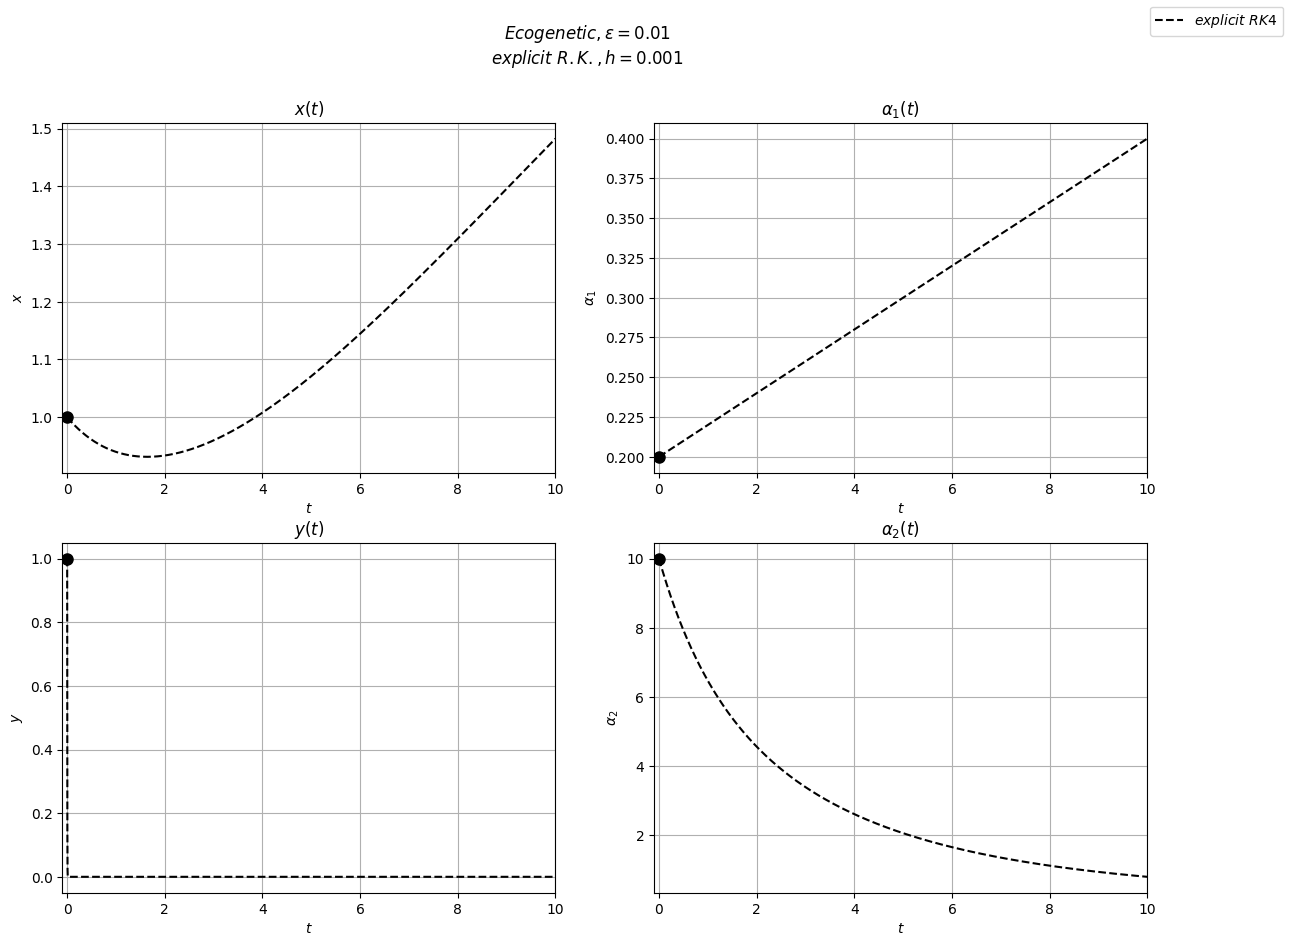

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [00:00<00:00, 16578.28it/s]


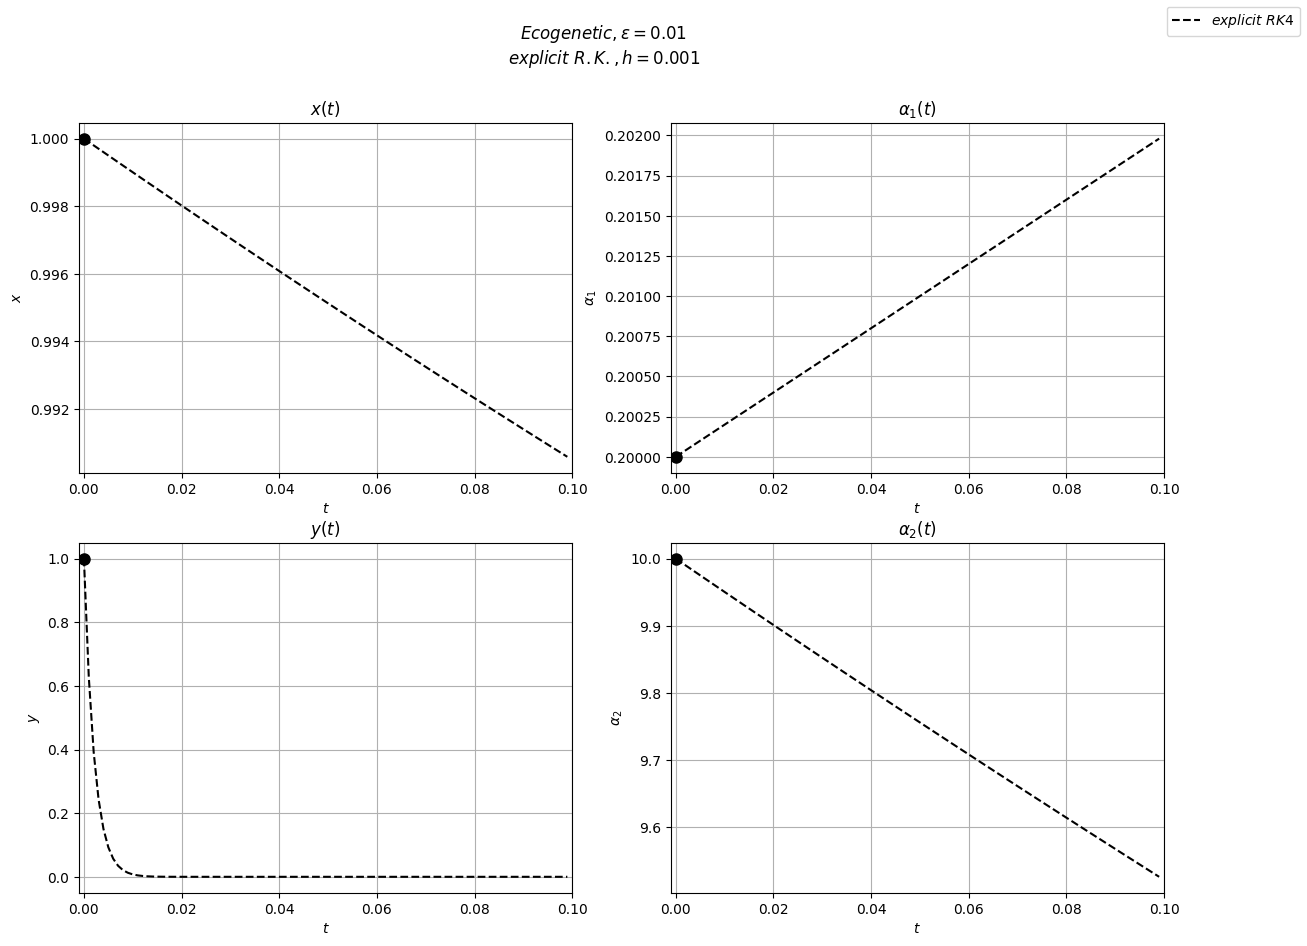

In [5]:
def solution_rk_explicit(e, h, time):
    solvers = [RungeKuttaCollection.create_e4(h)]

    labels = ["$explicit~ RK4$"]

    x0 = 1
    y0 = 1
    a10 = 0.2
    a20 = 10

    start = np.array([x0, y0, a10, a20])

    task(e, h, solvers, labels, "explicit~ R.K.", start, time)

solution_rk_explicit(0.01, 1e-3, (-.1, 10))
solution_rk_explicit(0.01, 1e-3, (-.001, 0.1))

> –ò–∑ –∫–∞—Ä—Ç–∏–Ω—ã y(t) –Ω–∞ –æ–±–æ–∏—Ö –≥—Ä–∞—Ñ–∏–∫–∞—Ö –≤–∏–¥–Ω–æ, —á—Ç–æ –∑–∞–¥–∞—á–∞ —è–≤–ª—è–µ—Ç—Å—è –∂–µ—Å—Ç–∫–æ–π

## 1. –ù–µ—è–≤–Ω—ã–π –ú–µ—Ç–æ–¥ –†—É–Ω–≥–µ-–ö—É—Ç—Ç—ã

### –í–∞–ª–∏–¥–∞—Ü–∏—è

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 6/6 [00:00<00:00, 3002.37it/s]


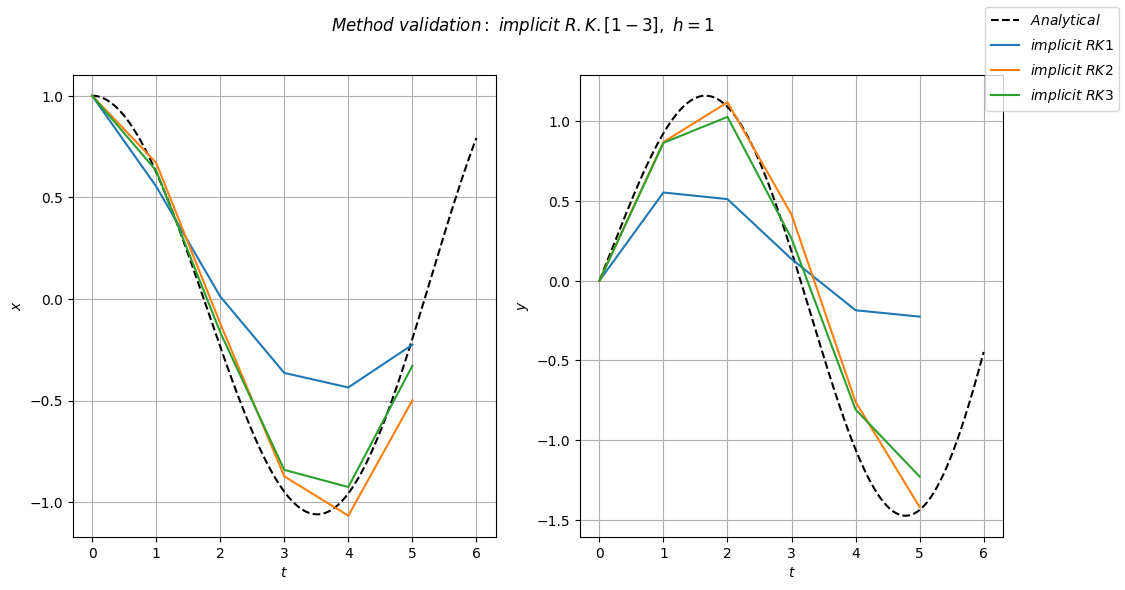

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 10000/10000 [00:02<00:00, 4181.75it/s]


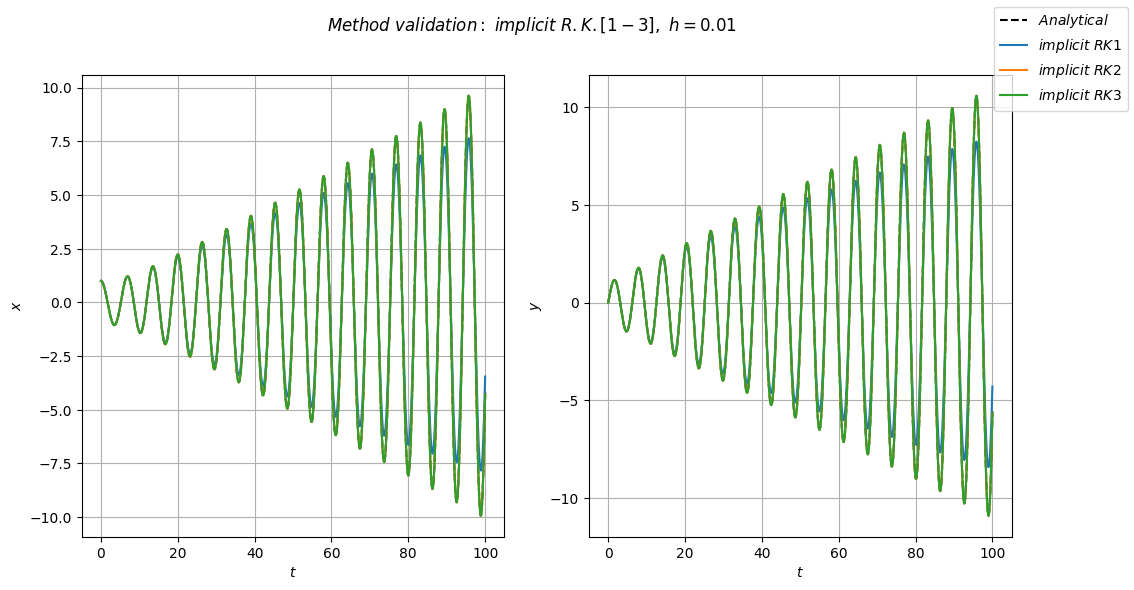

In [6]:
def validate_rk(steps, h):
    solvers = [RungeKuttaCollection.create_i1(h),
               RungeKuttaCollection.create_i2(h),
               RungeKuttaCollection.create_i3(h)]

    labels = ["$implicit~ RK1$", "$implicit~ RK2$", "$implicit~ RK3$"]

    validate(solvers, labels, steps, steps*h, f"implicit~ R.K. [1-3],~h={h}")
 
validate_rk(6, 1)
validate_rk(10000, 1e-2)

### –†–µ—à–µ–Ω–∏–µ

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 500/500 [00:00<00:00, 3334.85it/s]


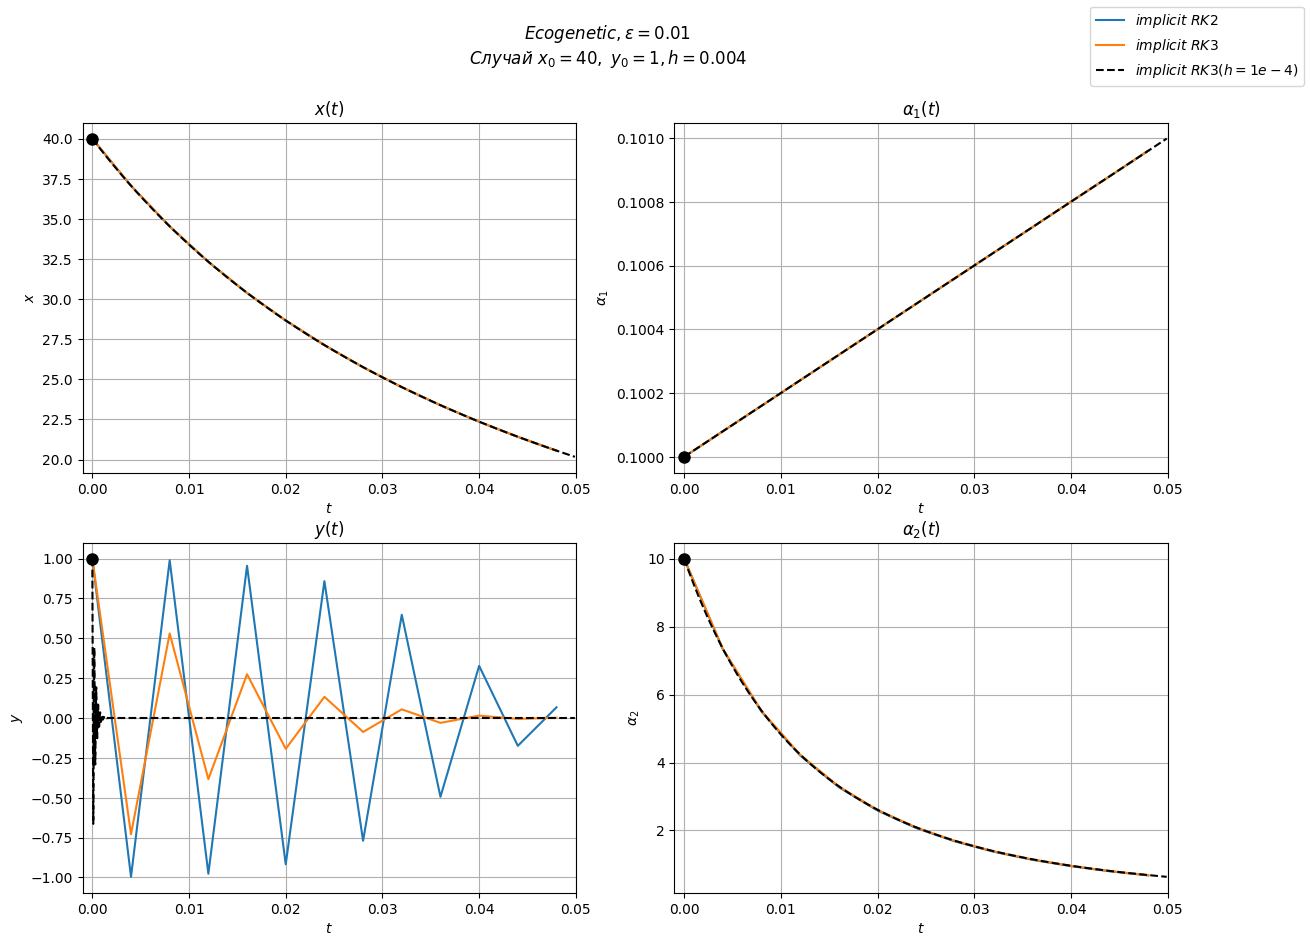

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 500/500 [00:00<00:00, 3949.33it/s]


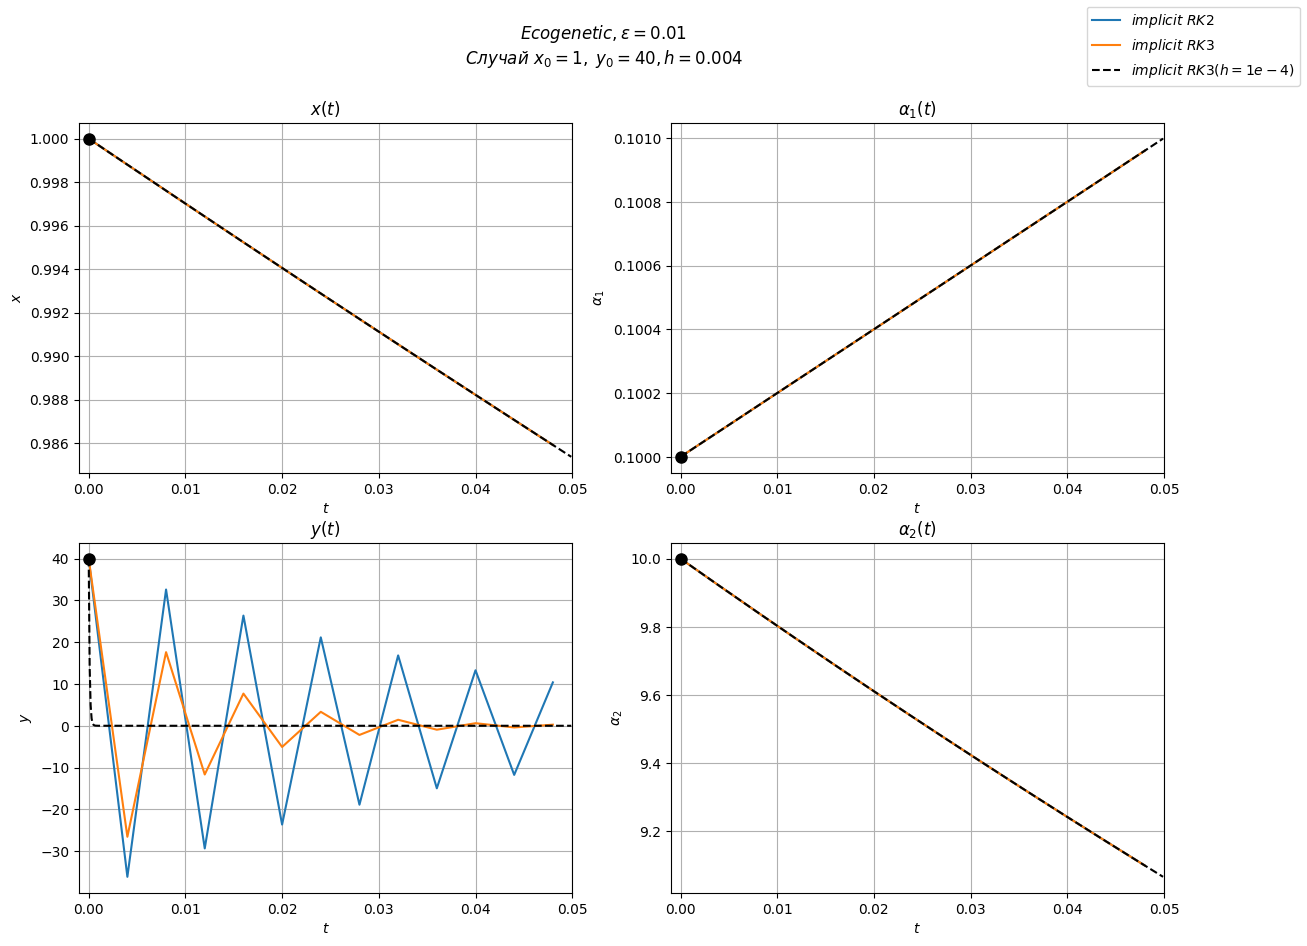

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 700/700 [00:00<00:00, 3829.81it/s]


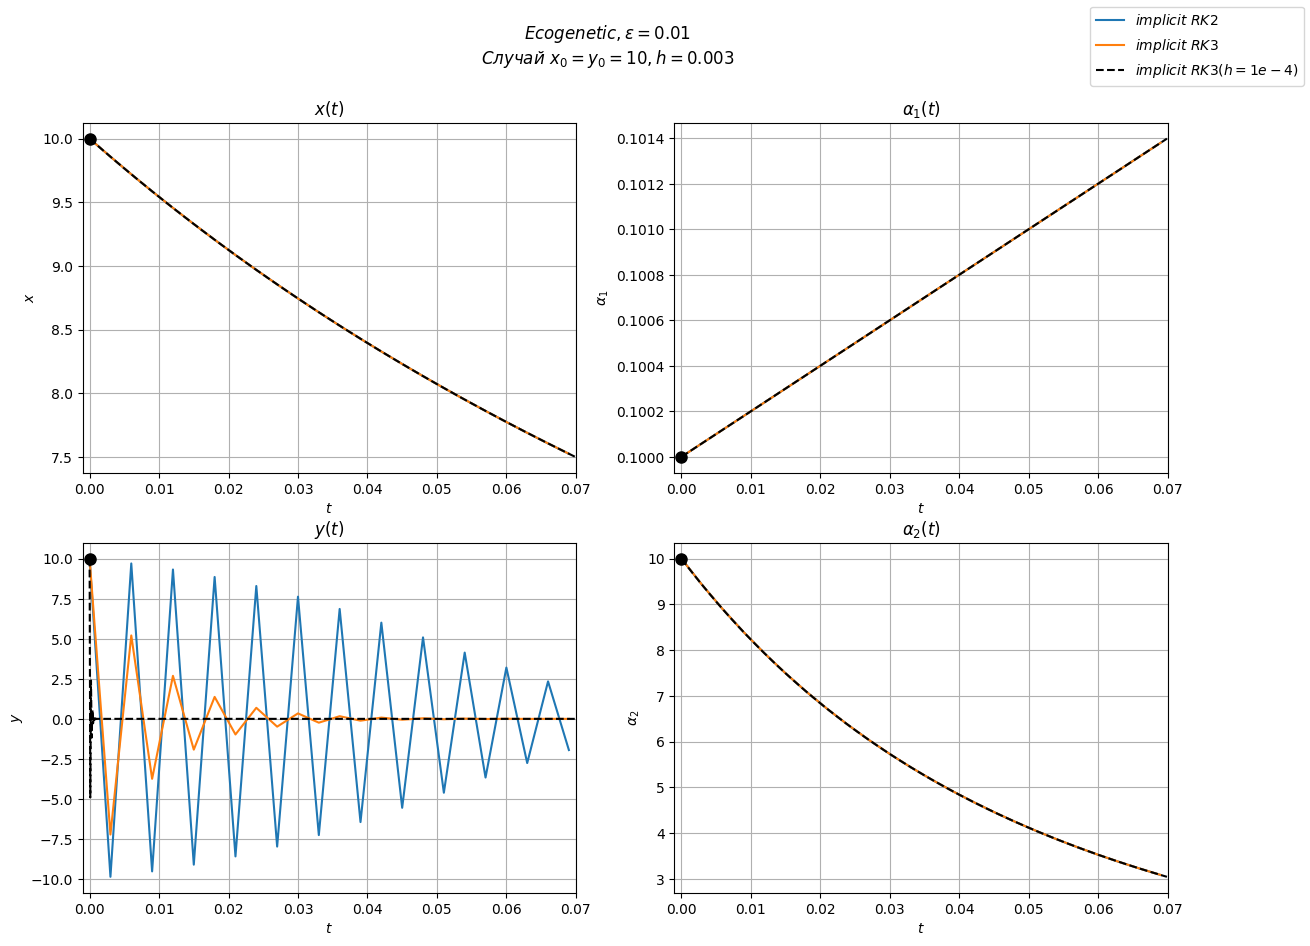

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 20000/20000 [00:04<00:00, 4340.92it/s]


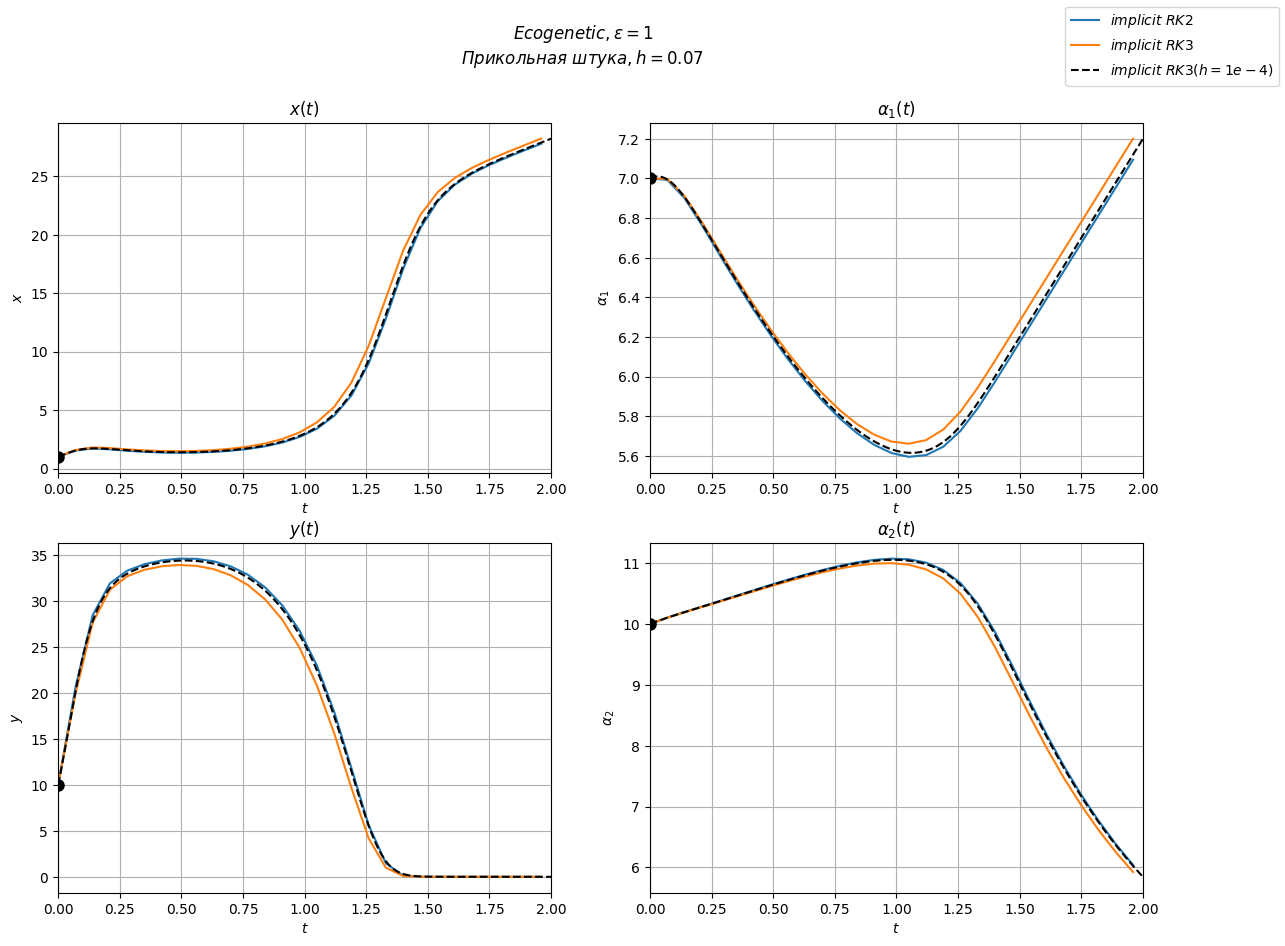

In [7]:
def solution_rk(h, scenario):
    solvers = [RungeKuttaCollection.create_i2(h),
               RungeKuttaCollection.create_i3(h),
               RungeKuttaCollection.create_i3(1e-4)]

    labels = ["$implicit~ RK2$", "$implicit~ RK3$", "$implicit~ RK3 (h=1e-4)$"]

    scenario.run(h, solvers, labels)

solution_rk(4e-3, Case1)
solution_rk(4e-3, Case2)
solution_rk(3e-3, Case3)
solution_rk(7e-2, Case4)

## 2.1 –ù–µ—è–≤–Ω—ã–π –º–µ—Ç–æ–¥ –ê–¥–∞–º—Å–∞

### –í–∞–ª–∏–¥–∞—Ü–∏—è

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 6/6 [00:00<00:00, 3983.19it/s]


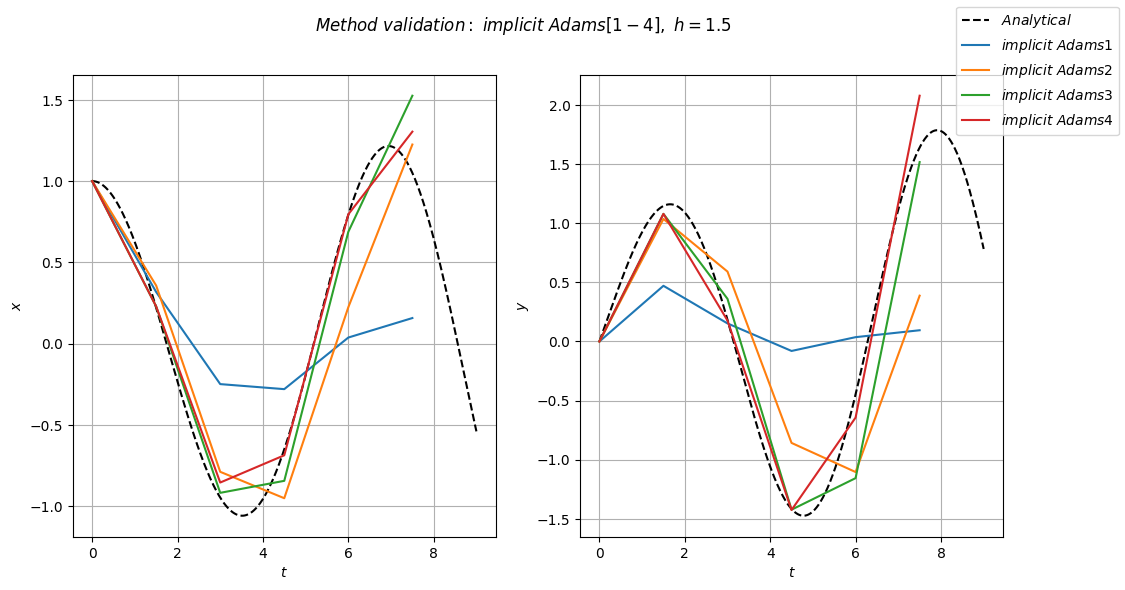

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 20000/20000 [00:00<00:00, 28672.28it/s]


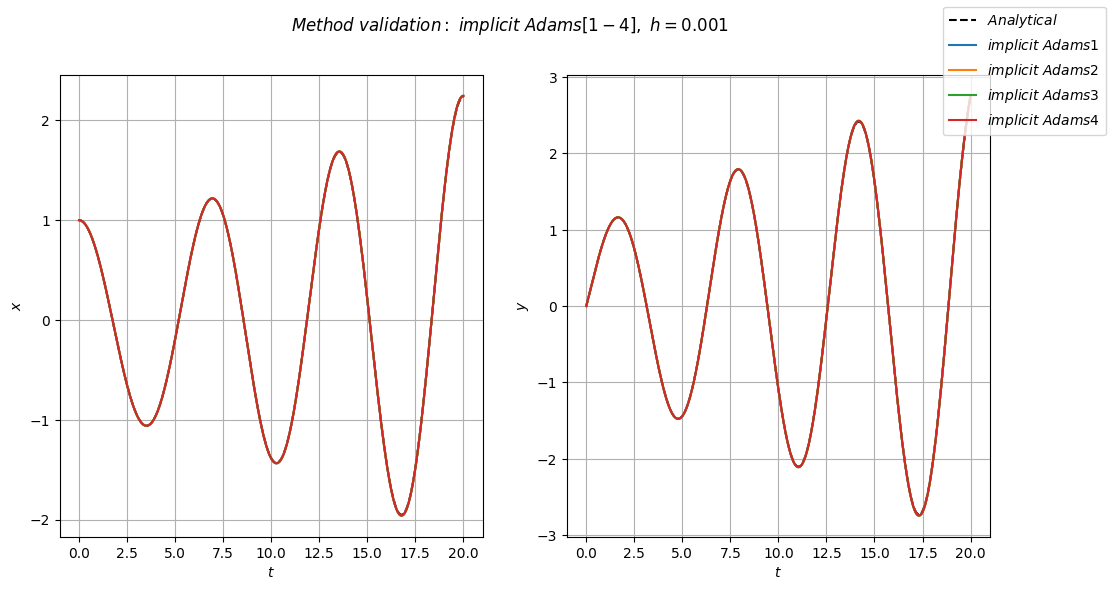

In [8]:
def validate_adams(steps, h):
    solvers = [AdamsCollection.create_i1(h),
               AdamsCollection.create_i2(h),
               AdamsCollection.create_i3(h),
               AdamsCollection.create_i4(h)]

    labels = ["$implicit~ Adams1$",
              "$implicit~ Adams2$",
              "$implicit~ Adams3$",
              "$implicit~ Adams4$"]

    validate(solvers, labels, steps, steps*h, f"implicit~ Adams [1-4],~h={h}")
 
validate_adams(6, 1.5)
validate_adams(20000, 1e-3)

### –†–µ—à–µ–Ω–∏–µ

> –ü–æ —É–º–æ–ª—á–∞–Ω–∏—é –≤ –º–Ω–æ–≥–æ—à–∞–≥–æ–≤—ã—Ö –º–µ—Ç–æ–¥–∞—Ö –¥–ª—è –≤—ã—á–∏—Å–ª–µ–Ω–∏—è —Ä–∞–∑–≥–æ–Ω–Ω–æ–≥–æ —É—á–∞—Å—Ç–∫–∞ —è –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–ª —è–≤–Ω—ã–π –º–µ—Ç–æ–¥ –†—É–Ω–≥–µ-–ö—É—Ç—Ç—ã —á–µ—Ç–≤–µ—Ä—Ç–æ–≥–æ –ø–æ—Ä—è–¥–∫–∞ —Å —Ç–µ–º –∂–µ —à–∞–≥–æ–º, —á—Ç–æ –∏ —É –∏—Å—Ö–æ–¥–Ω–æ–π –∑–∞–¥–∞—á–∏. <br>–ü–æ—Å–∫–æ–ª—å–∫—É –≤ –∫–æ–Ω–∫—Ä–µ—Ç–Ω–æ —ç—Ç–æ–π –∑–∞–¥–∞—á–µ —Ä–∞–∑–≥–æ–Ω–Ω—ã–π —É—á–∞—Å—Ç–æ–∫ —è–≤–ª—è–µ—Ç—Å—è –∂–µ—Å—Ç–∫–∏–º, —è –¥–æ–±–∞–≤–∏–ª –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç—å –∏–Ω—ä–µ–∫—Ü–∏–∏ –∂–µ–ª–∞–µ–º–æ–≥–æ –≤—Å–ø–æ–º–æ–≥–∞—Ç–µ–ª—å–Ω–æ–≥–æ —Å–æ–ª–≤–µ—Ä–∞ –≤ –∫–ª–∞—Å—Å –∏—Å—Ö–æ–¥–Ω–æ–≥–æ, –∞ —Ç–∞–∫–∂–µ –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç—å ?—Å—É–±–¥–∏—Å–∫—Ä–µ—Ç–∏–∑–∞—Ü–∏–∏? –∏—Å—Ö–æ–¥–Ω–æ–π —Å–µ—Ç–∫–∏ –Ω–∞ —Ä–∞–∑–≥–æ–Ω–Ω–æ–º —É—á–∞—Å—Ç–∫–µ. <br> –ò—Ç–∞–∫, –¥–ª—è –≤—ã—á–∏—Å–ª–µ–Ω–∏—è —Ä–∞–∑–≥–æ–Ω–Ω–æ–≥–æ —É—á–∞—Å—Ç–∫–∞ –±—É–¥–µ—Ç –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å—Å—è **–Ω–µ—è–≤–Ω—ã–π** –º–µ—Ç–æ–¥ –†—É–Ω–≥–µ-–ö—É—Ç—Ç—ã 3-–≥–æ –ø–æ—Ä—è–¥–∫–∞.

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 200/200 [00:00<00:00, 3737.71it/s]


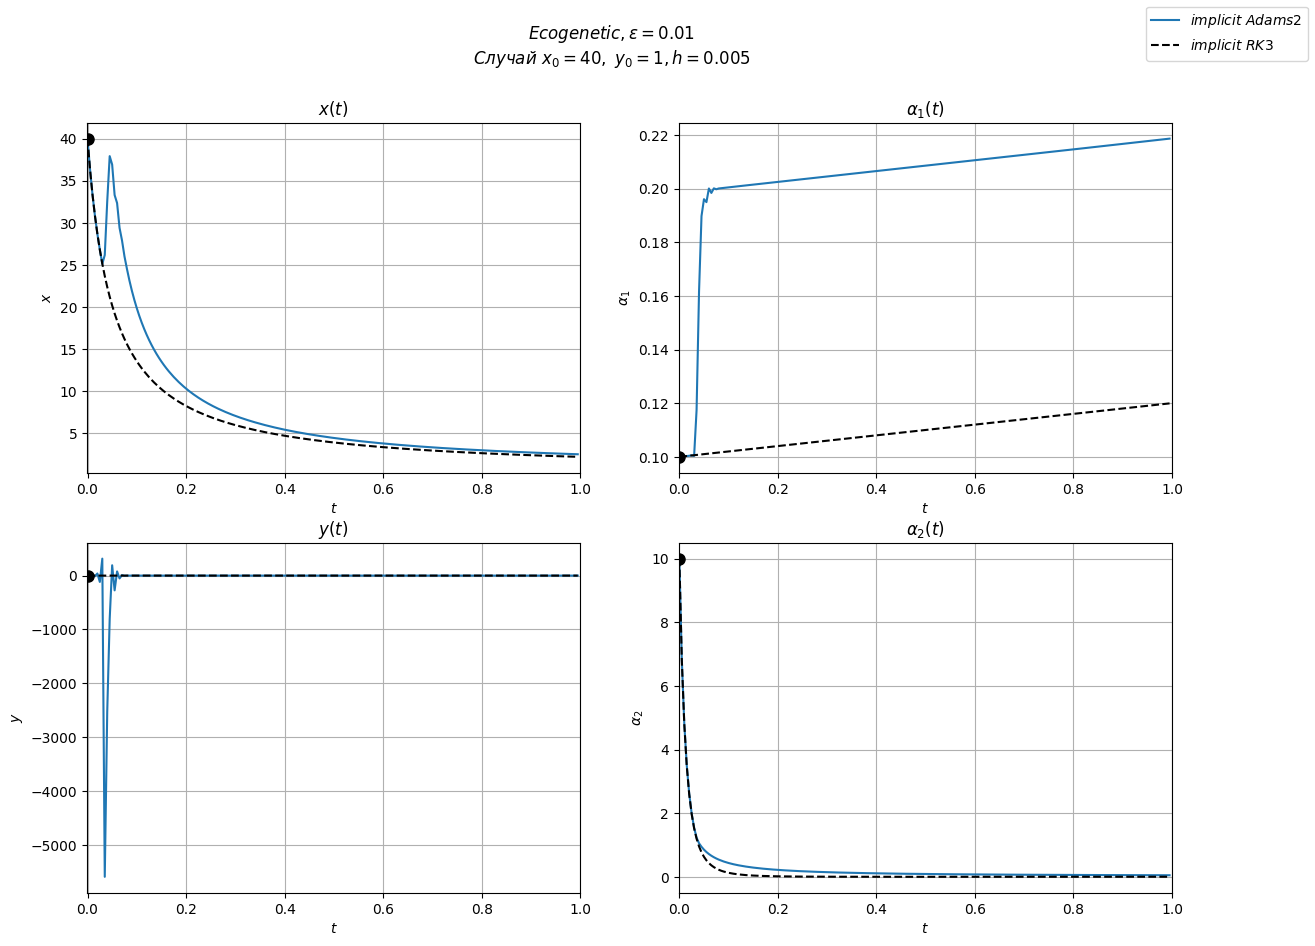

In [9]:
def solution_adams(h, scenario, override_time = None):
    aux = RungeKuttaCollection.create_i3
    sub = 1

    solvers = [AdamsCollection.create_i3(h, aux, sub),
               aux(h)]

    labels = ["$implicit~ Adams2$",
              "$implicit~ RK3$"]
    scenario.run(h, solvers, labels, override_time)

solution_adams(5e-3, Case1, (-0.001, 1))

> –ß—Ç–æ-—Ç–æ –ê–¥–∞–º—Å —Å–æ–≤—Å–µ–º —Ä–∞–∑–≤–∞–ª–∏–≤–∞–µ—Ç—Å—è –Ω–∞ –∂–µ—Å—Ç–∫–æ–π –∑–∞–¥–∞—á–µ, —Ö–æ—Ç—è –Ω–∞ –º—è–≥–∫–æ–π –≤—Å–µ –æ–∫ ü•≤<br> –ü–æ–ø—Ä–æ–±—É–µ–º –§–î–ù

## 2.2 –ù–µ—è–≤–Ω—ã–µ –§–î–ù

### –í–∞–ª–∏–¥–∞—Ü–∏—è

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 8/8 [00:00<00:00, 4000.29it/s]


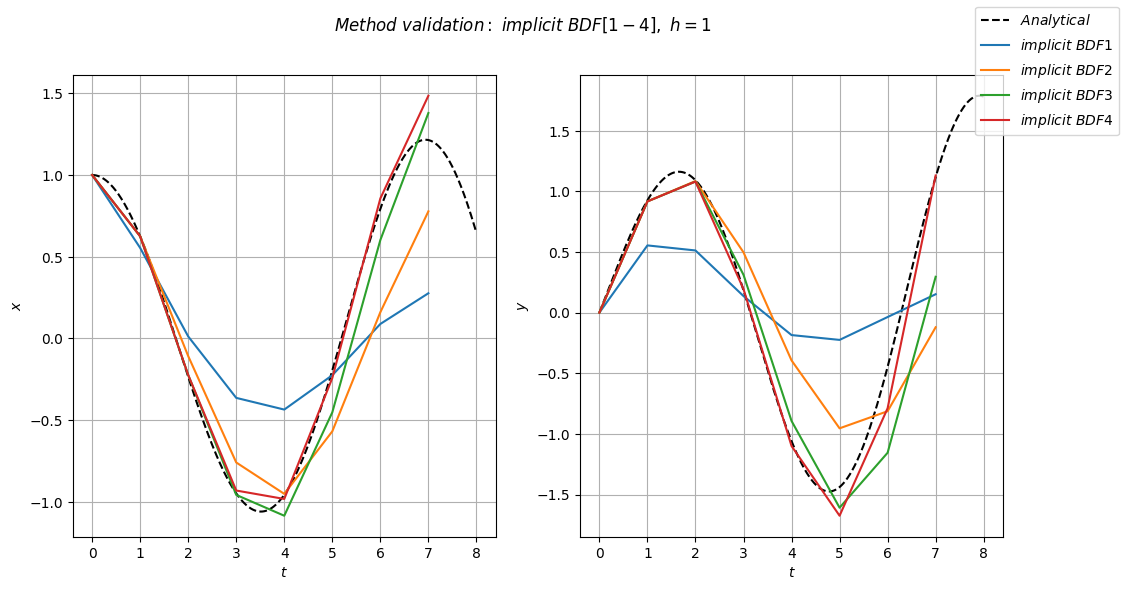

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 20000/20000 [00:00<00:00, 28696.83it/s]


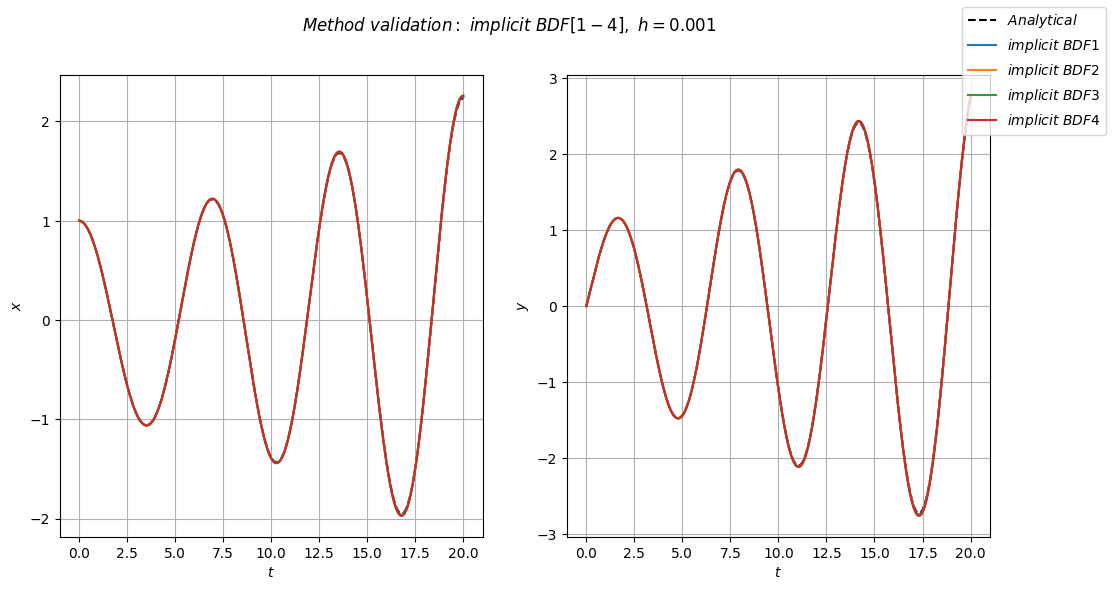

In [10]:
def validate_bdf(steps, h):
    solvers = [BDFCollection.create_i1(h),
               BDFCollection.create_i2(h),
               BDFCollection.create_i3(h),
               BDFCollection.create_i4(h)]

    labels = ["$implicit~ BDF1$",
              "$implicit~ BDF2$",
              "$implicit~ BDF3$",
              "$implicit~ BDF4$"]

    validate(solvers, labels, steps, steps*h, f"implicit~ BDF [1-4],~h={h}")
 
validate_bdf(8, 1)
validate_bdf(20000, 1e-3)

### –†–µ—à–µ–Ω–∏–µ

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 500/500 [00:00<00:00, 3744.03it/s]


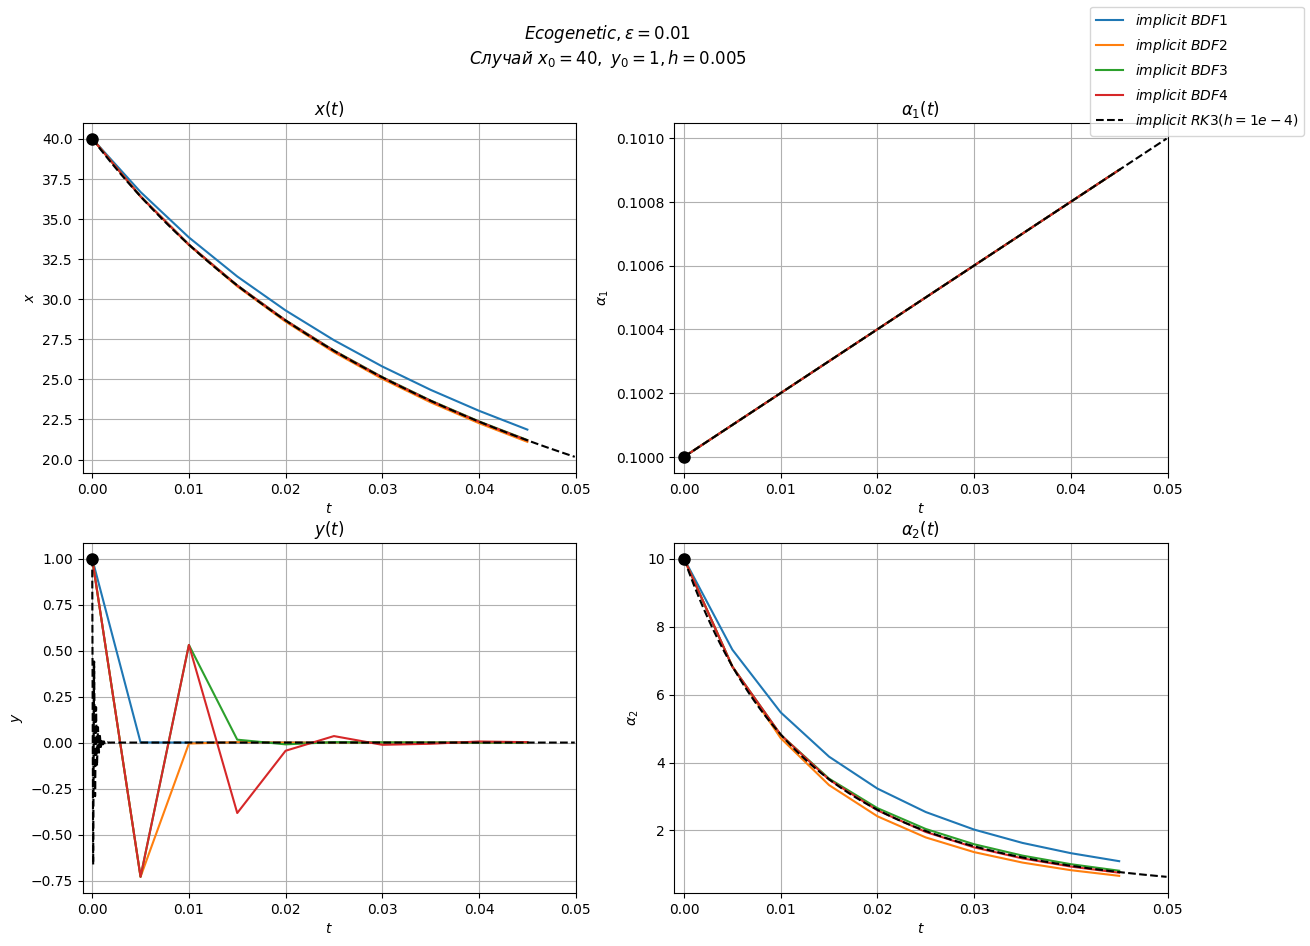

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 500/500 [00:00<00:00, 4043.54it/s]


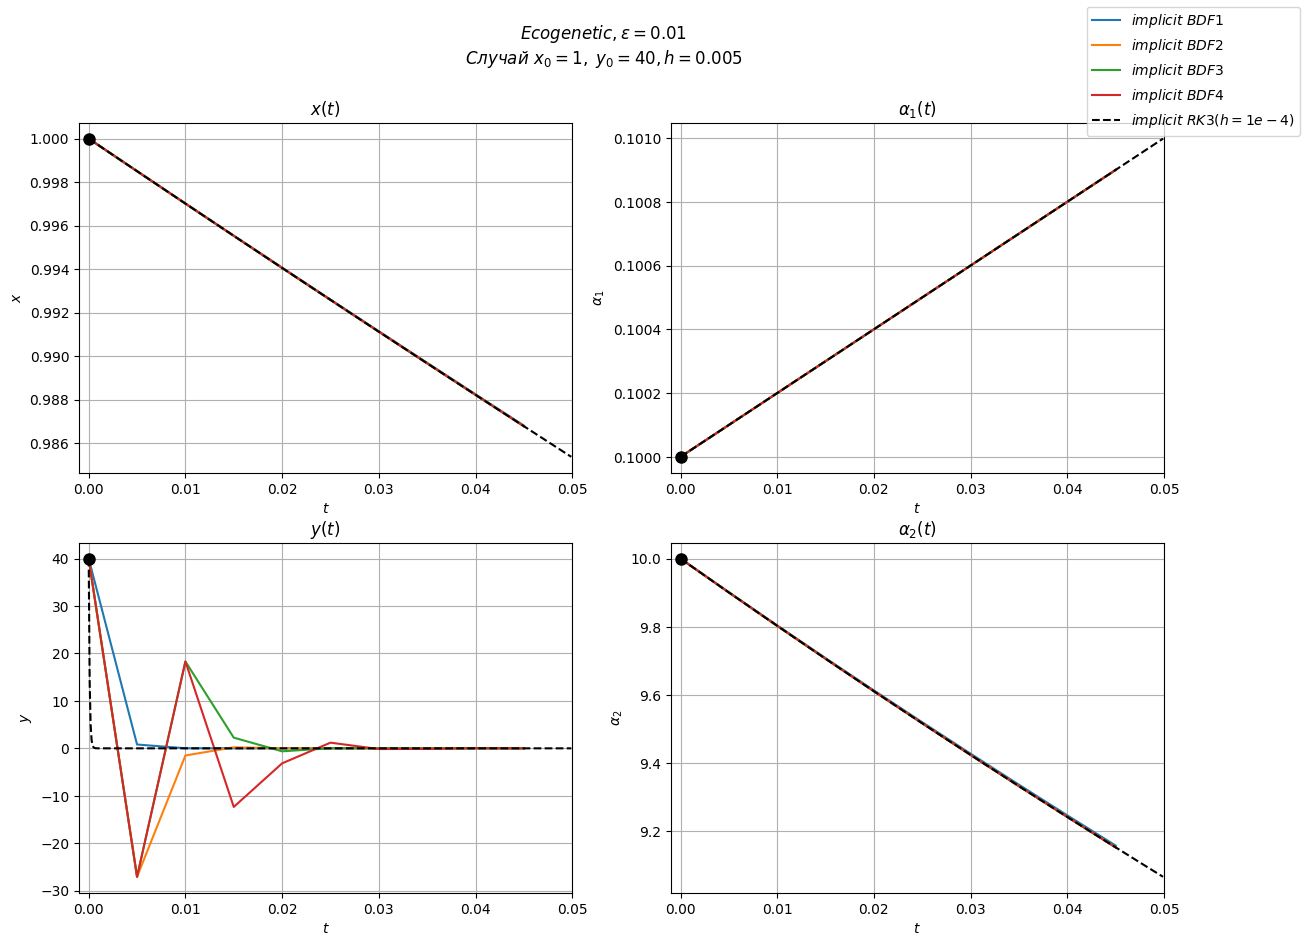

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 700/700 [00:00<00:00, 3927.33it/s]


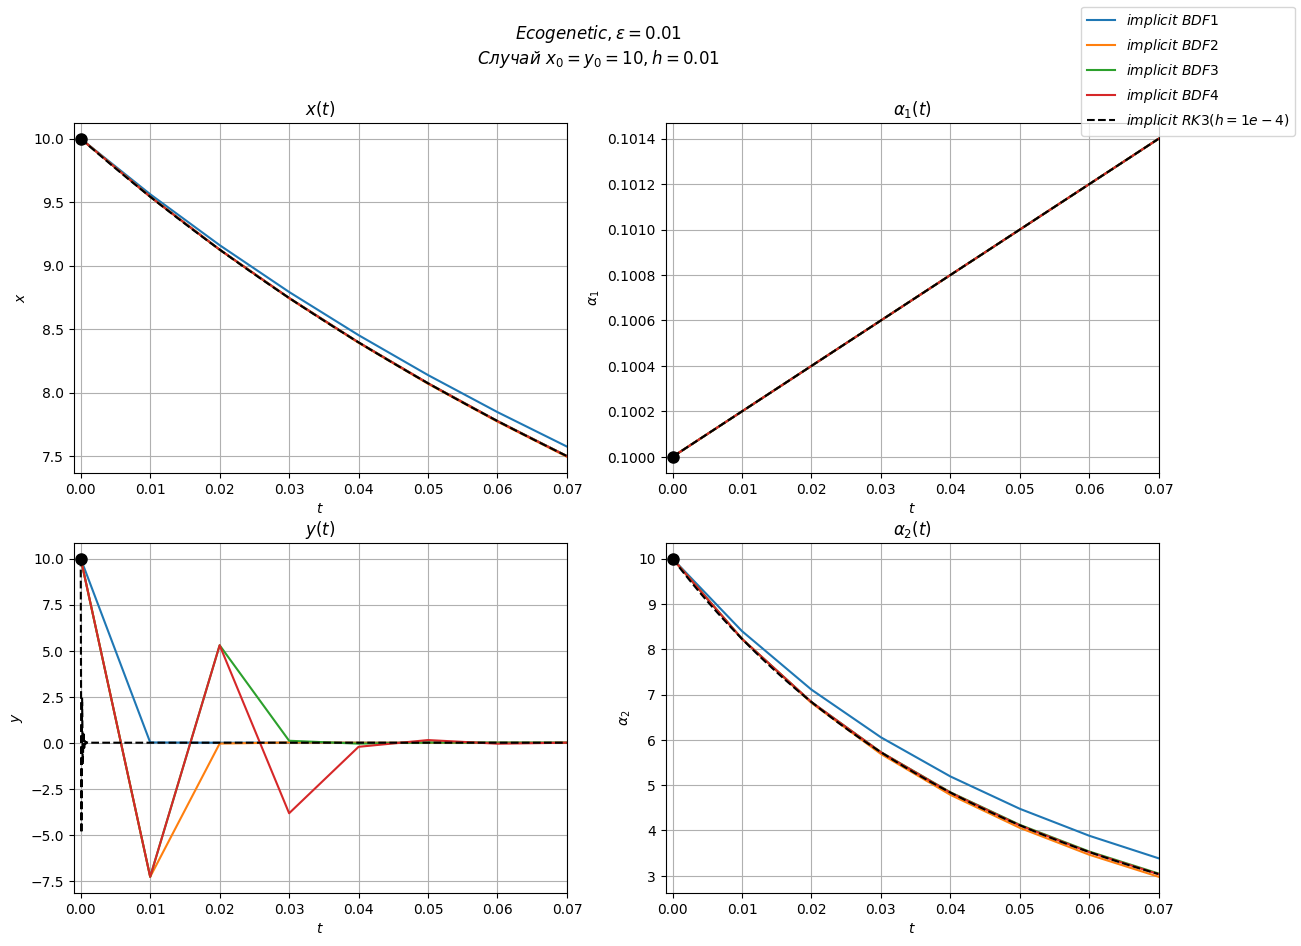

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 20000/20000 [00:04<00:00, 4257.96it/s]


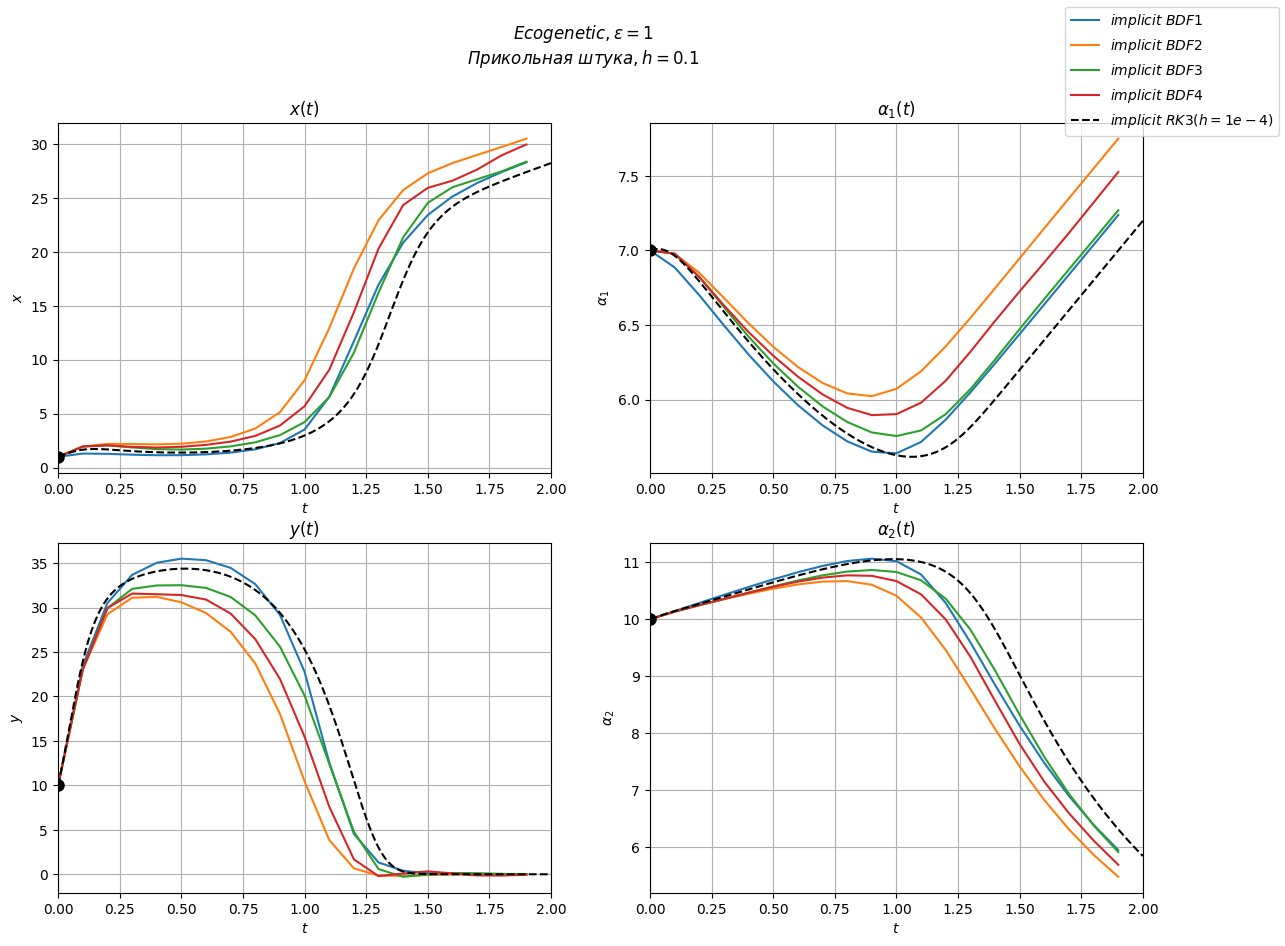

In [11]:
def solution_bdf(h, scenario, override_time = None):
    aux = RungeKuttaCollection.create_i3
    sub = 1

    solvers = [BDFCollection.create_i1(h, aux, sub),
               BDFCollection.create_i2(h, aux, sub),
               BDFCollection.create_i3(h, aux, sub),
               BDFCollection.create_i4(h, aux, sub),
               RungeKuttaCollection.create_i3(1e-4)]

    labels = ["$implicit~ BDF1$",
              "$implicit~ BDF2$",
              "$implicit~ BDF3$",
              "$implicit~ BDF4$",
              "$implicit~ RK3 (h=1e-4)$"]
    scenario.run(h, solvers, labels, override_time)

solution_bdf(5e-3, Case1)
solution_bdf(5e-3, Case2)
solution_bdf(1e-2, Case3)
solution_bdf(1e-1, Case4)

## 3. –ú–µ—Ç–æ–¥—ã –†–æ–∑–µ–Ω–±—Ä–æ–∫–∞-–í–∞–Ω–Ω–µ—Ä–∞

> –†–µ–º–∞—Ä–∫–∞: –∏—Å—Ö–æ–¥–Ω—ã–µ –º–µ—Ç–æ–¥—ã –±—ã–ª–∏ –¥–∞–Ω—ã –¥–ª—è –∞–≤—Ç–æ–Ω–æ–º–Ω—ã—Ö —Å–∏—Å—Ç–µ–º, —è –∏—Ö –Ω–µ–º–Ω–æ–≥–æ –º–æ–¥–∏—Ñ–∏—Ü–∏—Ä–æ–≤–∞–ª –¥–æ–±–∞–ª–µ–Ω–∏–µ–º –≤—Ä–µ–º–µ–Ω–∏ $f_n = f(y_n, t_n)$. –≠—Ç–æ –Ω—É–∂–Ω–æ –¥–ª—è —Ç–æ–≥–æ, —á—Ç–æ–±—ã –∑–∞–ø—É—Å—Ç–∏—Ç—å –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω—É—é –∑–∞–¥–∞—á—É, –∫–æ—Ç–æ—Ä–∞—è –Ω–µ–∞–≤—Ç–æ–Ω–æ–º–Ω–∞ 

–ò—Å–ø–æ–ª—å–∑—É—é—Ç—Å—è 2 –º–µ—Ç–æ–¥–∞: CROS –∏ –º–µ—Ç–æ–¥ –∏–∑ —Å—Ç–∞—Ç—å–∏ *"–ï.–ê. –ù–æ–≤–∏–∫–æ–≤: –ú–ï–¢–û–î –¢–ò–ü–ê –†–û–ó–ï–ù–ë–†–û–ö–ê –¢–†–ï–¢–¨–ï–ì–û –ü–û–†–Ø–î–ö–ê
–° –í–ù–£–¢–†–ï–ù–ù–ï–ô L-–£–°–¢–û–ô–ß–ò–í–û–°–¢–¨–Æ"*

### –í–∞–ª–∏–¥–∞—Ü–∏—è

  0%|          | 0/200 [00:00<?, ?it/s]

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 200/200 [00:00<00:00, 4267.32it/s]


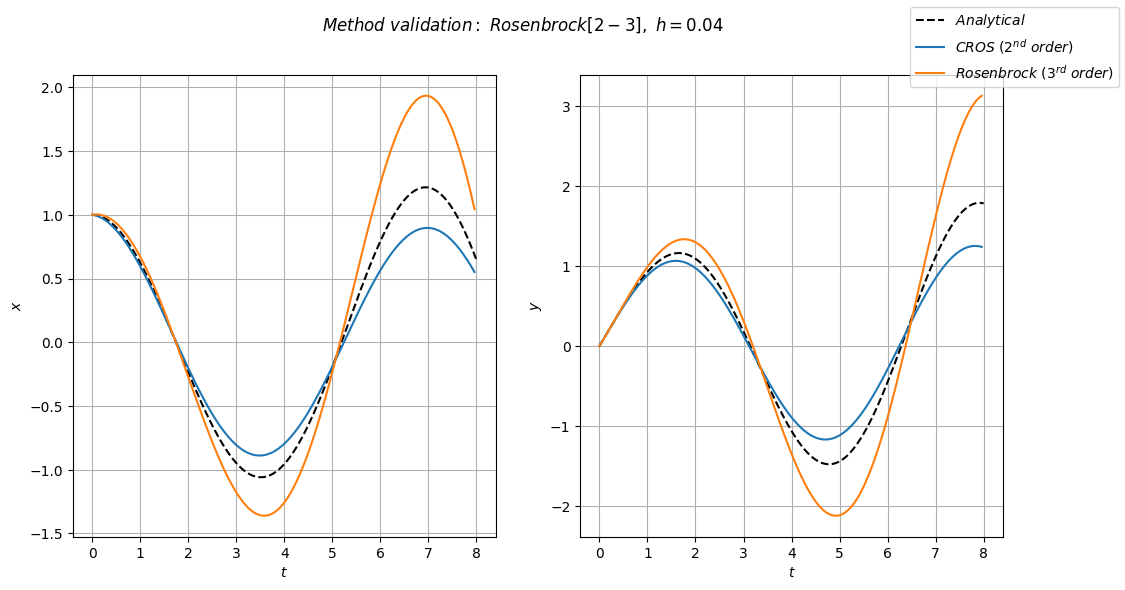

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 20000/20000 [00:04<00:00, 4842.99it/s]


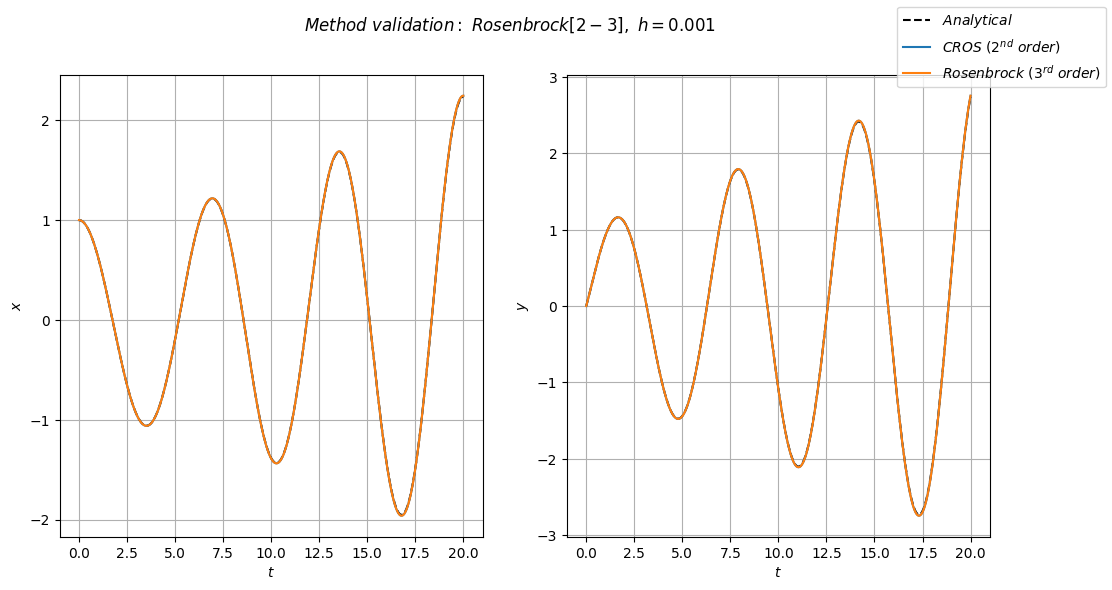

In [12]:
def validate_rock(steps, h):
    solvers = [CROSSolver(h),
               Rbrk3Solver(h)]

    labels = ["$CROS~ (2^{nd} ~order)$",
              "$Rosenbrock~ (3^{rd} ~order)$"]

    validate(solvers, labels, steps, steps*h, f"Rosenbrock [2-3],~h={h}")
 
validate_rock(200, 0.04)
validate_rock(20000, 1e-3)

### –†–µ—à–µ–Ω–∏–µ

  0%|          | 0/9 [00:00<?, ?it/s]

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1700/1700 [00:00<00:00, 3972.71it/s]


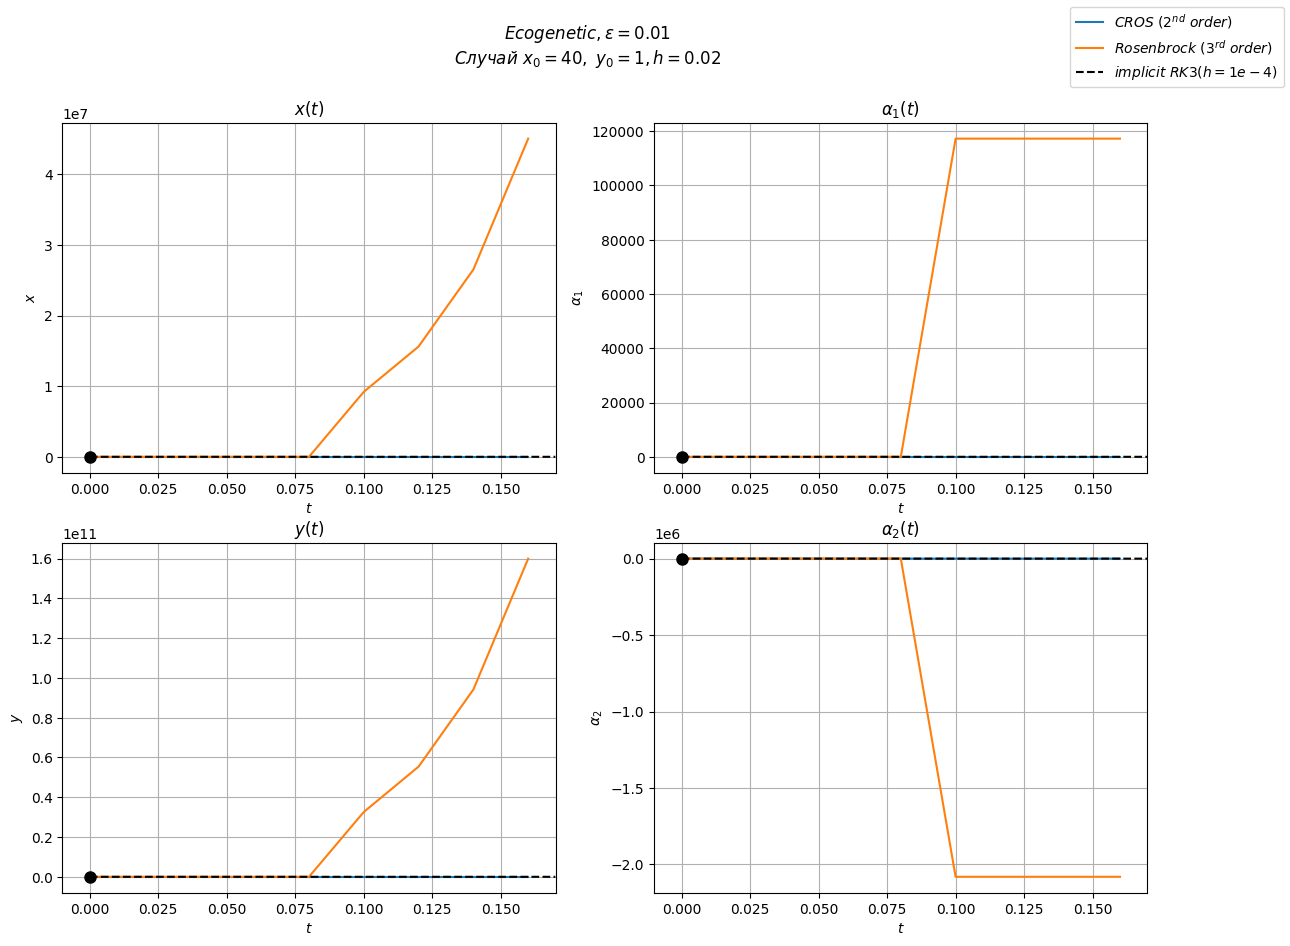

In [13]:
def solution_rock(h, scenario, override_time = None):
    solvers = [CROSSolver(h),
               Rbrk3Solver(h),
               RungeKuttaCollection.create_i3(1e-4)]

    labels = ["$CROS~ (2^{nd} ~order)$",
              "$Rosenbrock~ (3^{rd} ~order)$",
              "$implicit~ RK3 (h=1e-4)$"]
    
    scenario.run(h, solvers, labels, override_time)

solution_rock(2e-2, Case1, (-0.01, .17))
#solution_rock(1e-3, Case2)
#solution_rock(1e-3, Case3)
#solution_rock(1e-1, Case4)

> –†–æ–∑–µ–Ω–±—Ä–æ–∫ 3–µ–≥–æ –ø–æ—Ä—è–¥–∫–∞ —É–ª–µ—Ç–∞–µ—Ç –Ω–∞ –∂–µ—Å—Ç–∫–æ–π –∑–∞–¥–∞—á–µ, –Ω–∞ –º—è–≥–∫–æ–π –≤—Å–µ –æ–∫. –î–∞–ª—å—à–µ –±—É–¥–µ–º —Ä–∏—Å–æ–≤–∞—Ç—å —Ç–æ–ª—å–∫–æ CROS.

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 10000/10000 [00:00<00:00, 13346.91it/s]


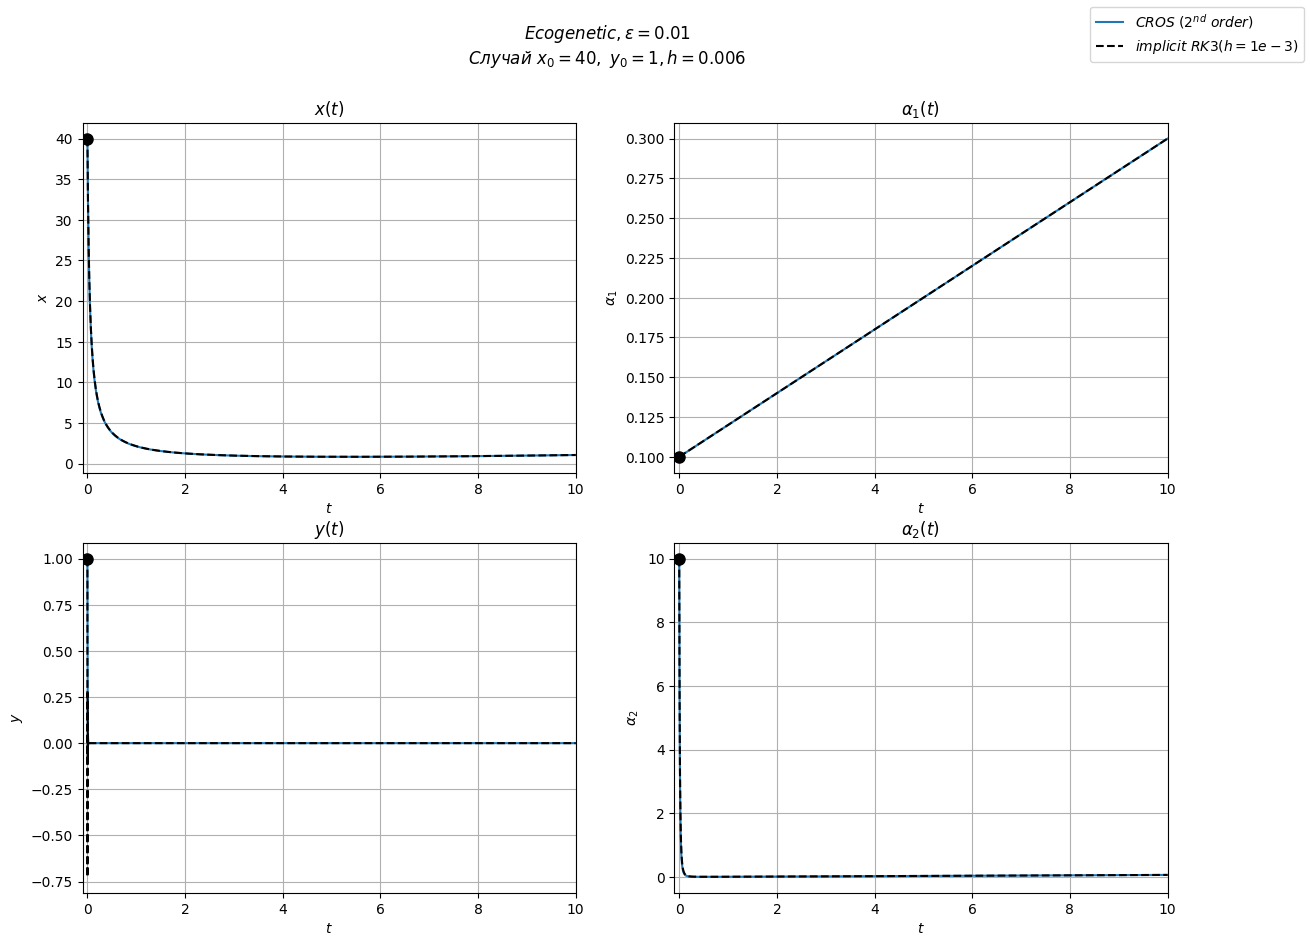

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 10000/10000 [00:00<00:00, 12835.07it/s]


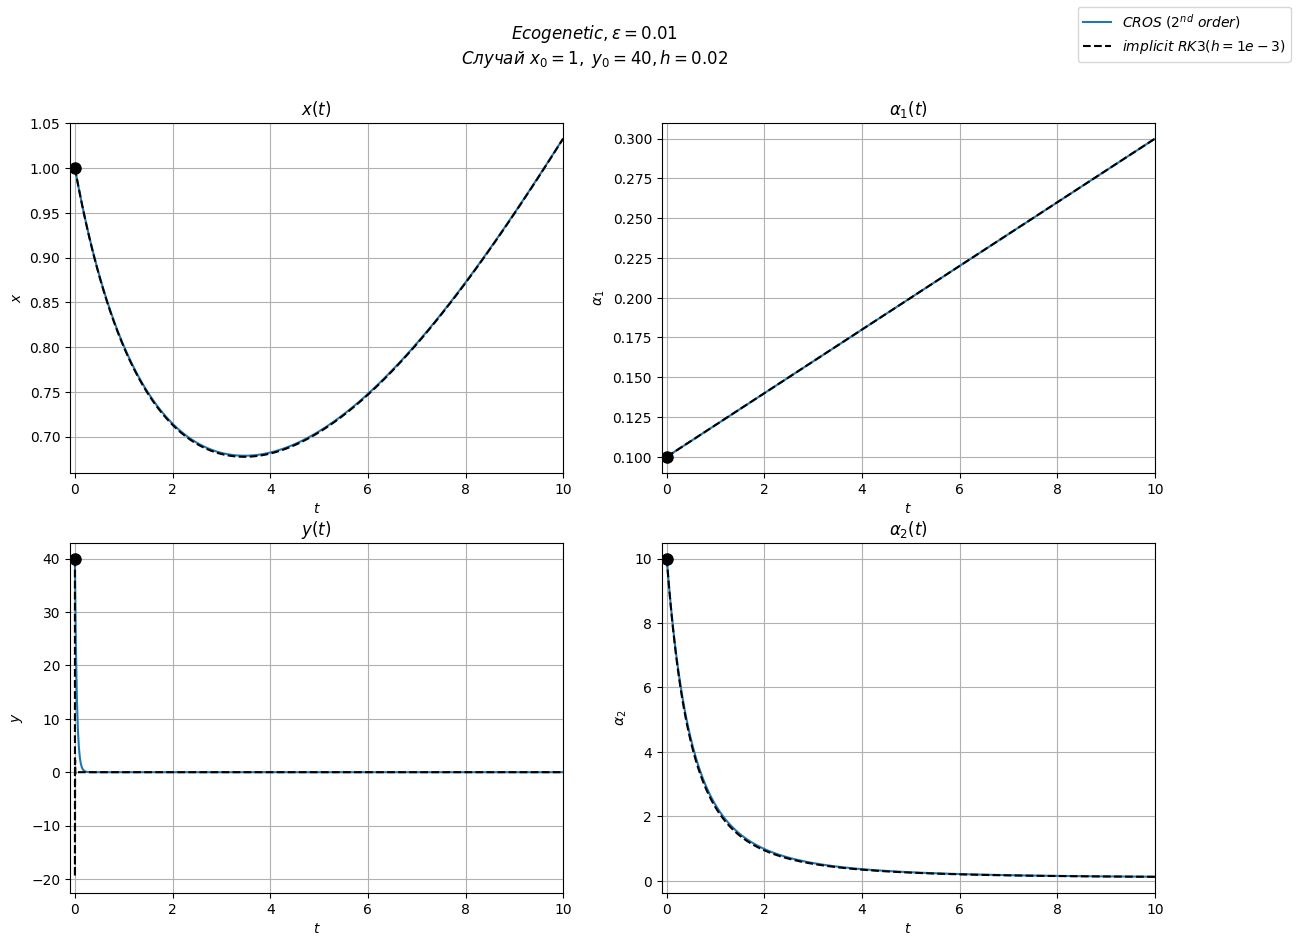

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 200/200 [00:00<00:00, 3388.86it/s]


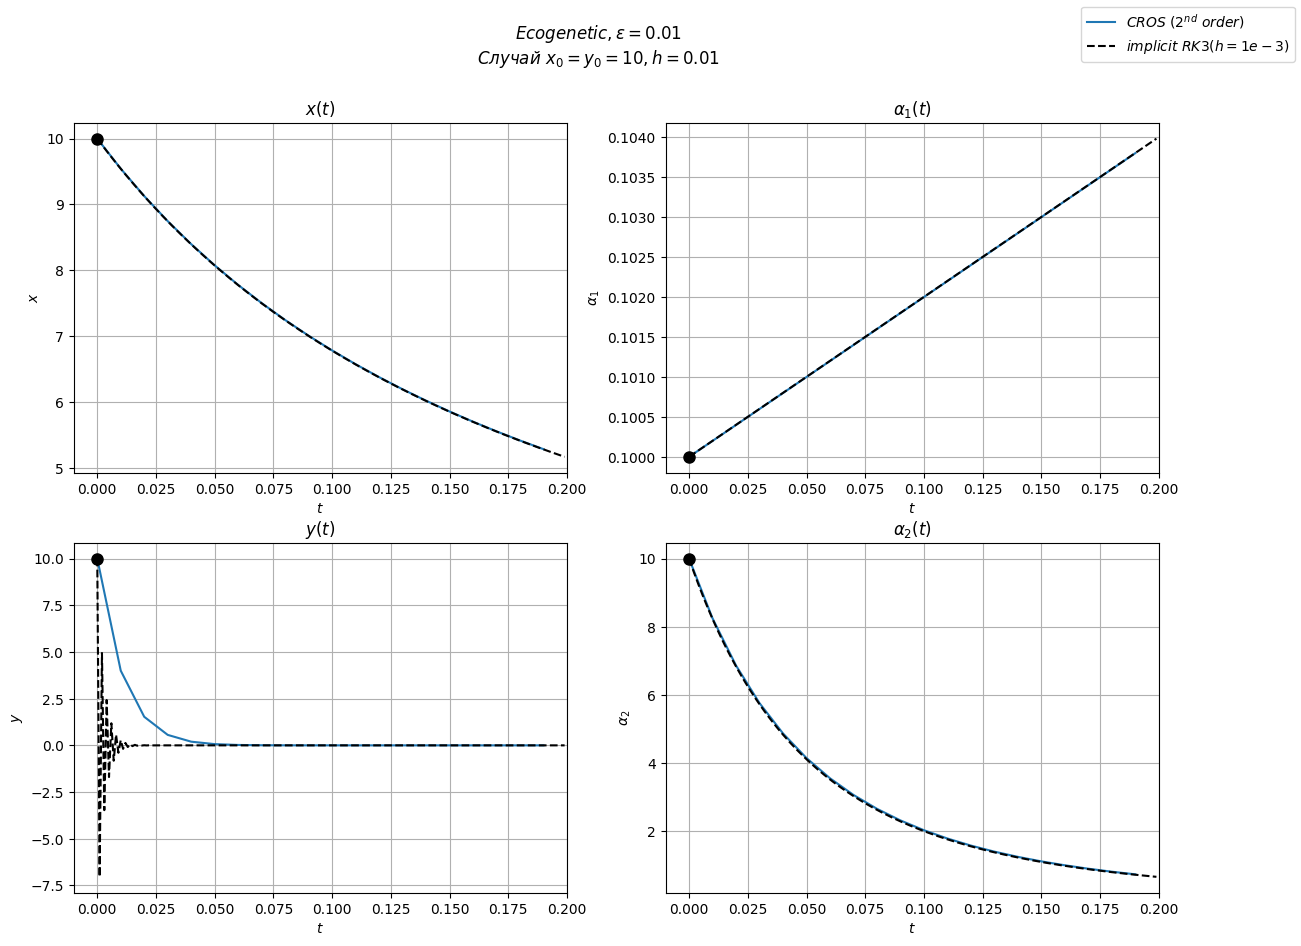

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2000/2000 [00:00<00:00, 4092.28it/s]


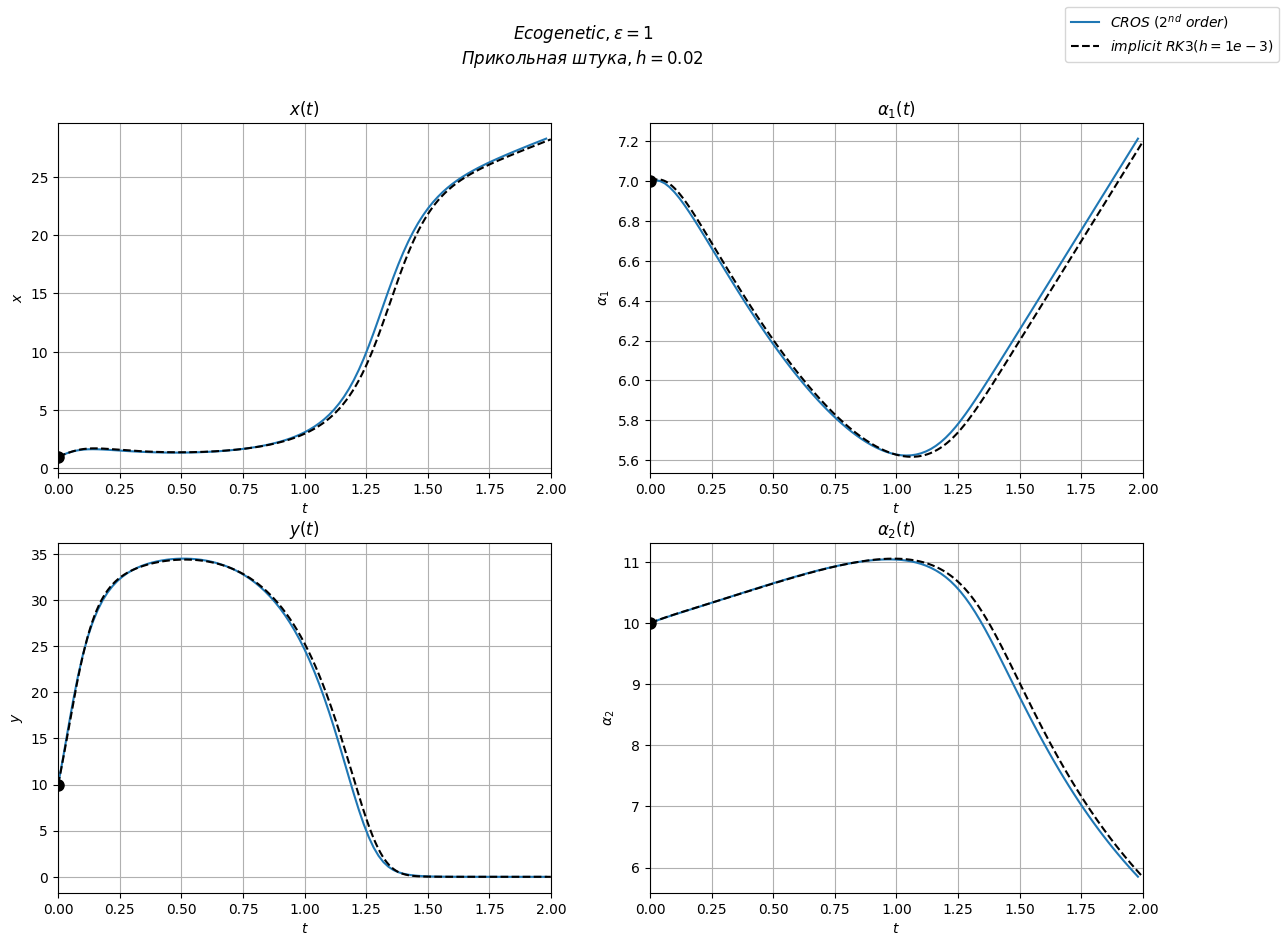

In [14]:
def solution_rock_1(h, scenario, override_time = None):
    solvers = [CROSSolver(h),
               RungeKuttaCollection.create_i3(1e-3)]

    labels = ["$CROS~ (2^{nd} ~order)$",
              "$implicit~ RK3 (h=1e-3)$"]
    
    scenario.run(h, solvers, labels, override_time)

solution_rock_1(6e-3, Case1, (-0.1, 10))
solution_rock_1(2e-2, Case2, (-0.1, 10))
solution_rock_1(1e-2, Case3, (-0.01, 0.2))
solution_rock_1(2e-2, Case4)

> –í—ã–≤–æ–¥: –ú–µ—Ç–æ–¥—ã –†—É–Ω–≥–µ –ö—É—Ç—Ç—ã –ø–æ–∫–∞–∑–∞–ª–∏ —Å–µ–±—è –Ω–∞–∏–±–æ–ª–µ–µ —É–Ω–∏–≤–µ—Ä—Å–∞–ª—å–Ω—ã–º–∏